# Exploring Supervised Learning
@ Principal component analysis
@ Fishers- Linear Discriminant Analysis
@ TSNE
@ K-Nearest Neighbour classifier
@ Parzen Window classifier
@ Logistic regression
@ Perceptron

In [1]:
import pandas as pd
import numpy as np

## sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA    ## Principal component analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  ## Fishers- Linear Discriminant Analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier ## KNN
from sklearn.neighbors import KernelDensity  ## Parzen Window classifier
from sklearn.linear_model import LogisticRegression ## Logistic regression
from sklearn.linear_model import Perceptron  ## Perceptron

## visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting module

from itertools import combinations

#### Reading the MNIST DATA SET

In [2]:
tmnist_data = pd.read_csv('tmnst.csv')

In [3]:
## Checking if data is read correctly.
tmnist_data[:5]

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalizing each pixel value to be within [0,1] instead of being in [0,255] 

In [4]:
columns = tmnist_data.columns
for c in columns:
    if c != 'labels':
        tmnist_data[c] = tmnist_data[c]/255

#### Splitting each class into 70% train and 30% test data

In [5]:
print(tmnist_data.shape)
## tmnist_data.groupby('labels')['labels'].value_counts() 
## each alphabet has 2874 rows.
## (26 * 2874, 28 * 28)

(74724, 785)


In [6]:
## Separating the features into X and label in Y
Xf = tmnist_data.iloc[:, 1:]
Yf = tmnist_data['labels']

In [7]:
## divide into Test-Train with stratify on labels so that, we have an uniform 70-30 split of each label
yf = tmnist_data['labels']
Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(Xf, Yf, test_size = 0.3, stratify = yf, random_state = 0)

## Visualizing PCA vs. Fisher Scatter Plots

In [69]:
## A function to derive the first 3 principal and Fisher components
## The components are compared by representing them in their individual 3D space.
def pca_vs_fisher_3d(X_train, Y_train, class_label):
    X = X_train
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(Y_train)
    
    # Creating an instance of PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    # The first 3 pricipal components
    first_3_principal_components = X_pca[:, :3]
    
    # Create an instance of LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=3)
    X_lda = lda.fit_transform(X, labels)
    first_3_fisher_components = X_lda[:, :3]
    
    ##return(first_3_principal_components, first_3_fisher_components)
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 6))
       
    # Scatter plot1 for the first 3 principal component and corresponding labels
    x1 = first_3_principal_components[:, 0] ## 1st principal component
    y1 = first_3_principal_components[:, 1] ## 2nd principal component
    z1 = first_3_principal_components[:, 2] ## 3rd principal component

    # PCA Scatter plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x1, y1, z1, c=labels, cmap='viridis', marker='o')

    # Set labels for each axis
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.set_zlabel('Principal Component 3')
    # Set a title for the plot
    ax1.set_title('3D Scatter Plot of Principal Components')
    
    # Scatter plot2 for the first 3 linear discriminant and corresponding labels
    x2 = first_3_fisher_components[:, 0] ## 1st linear discriminant
    y2 = first_3_fisher_components[:, 1] ## 2nd linear discriminant
    z2 = first_3_fisher_components[:, 2] ## 3rd linear discriminant

    # LDA Scatter plot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x2, y2, z2, c=labels, cmap='viridis', marker='o')

    # Set labels for each axis
    ax2.set_xlabel('Linear Discriminant 1')
    ax2.set_ylabel('Linear Discriminant 2')
    ax2.set_zlabel('Linear Discriminant 3')
    # Set a title for the plot
    ax2.set_title('3D Scatter Plot of Linear Discriminants')

    # Show the plot
    plt.show()
    

In [15]:
label_class = ['A', 'C', 'O', 'X']
data = tmnist_data[tmnist_data['labels'].isin(label_class)]
print(data.shape)

(11496, 785)


In [23]:
X = data.iloc[:, 1:]
print("X :", X.shape)
Y = data['labels']
print("Y : ", Y.shape)
## divide into Test-Train with stratify on labels so that, we have an uniform 70-30 split of each label
y = tmnist_data['labels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,  random_state = 0)
print("XTrain: ", X_train.shape, "YTrain: ", Y_train.shape)
print("XText: ", X_test.shape, "YTest: ", Y_test.shape)

X : (11496, 784)
Y :  (11496,)
XTrain:  (8047, 784) YTrain:  (8047,)
XText:  (3449, 784) YTest:  (3449,)


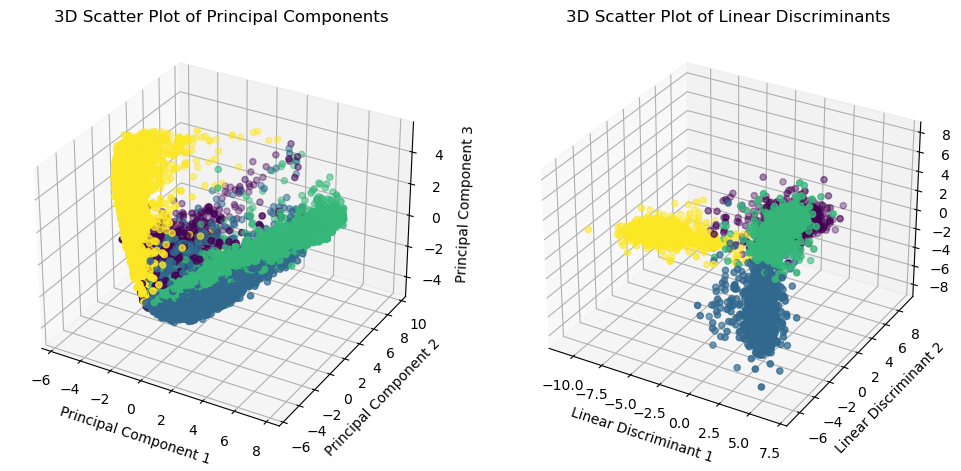

In [70]:
pca_vs_fisher_3d(X_train, Y_train, label_class)

Both PCA nd LDA were applied on the same data and also to the same level (first 3 components), but from the plots above it is evident that LDA has managed to separate the 4 class better than PCA. 
In LDA, the yellow dots and the deep blue dots are distinctly seperable and green and violet maybe having an angle issue to view them properly.
While in PCA, the yellow is distinct, green and blue are very close, overlapping.

## Visualizing all Classes via their Fisher Distance and t-SNE

### Fisher Distance

In [71]:
np.random.seed(42)
X = Xf_train
y = Yf_train

# Extract unique class labels
unique_classes = np.unique(y)
unique_classes

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [73]:
fisher_distances = {'class1':[],
                    'class2':[],
                    'fisher values':[]}

In [75]:
# Iterate through all pairs of classes
for class1, class2 in combinations(unique_classes, 2):
    # Select data points corresponding to the current pair of classes
    X_pair = X[(y == class1) | (y == class2)]
    y_pair = y[(y == class1) | (y == class2)]
    
    # Apply Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X_pair, y_pair)
    
    # Compute Fisher Discriminant distance
    fisher_distance = np.abs(np.mean(X_lda[y_pair == class1]) - np.mean(X_lda[y_pair == class2]))
    
    # Store the result in the Dictionary
    fisher_distances['class1'].append(class1)
    fisher_distances['class2'].append(class2)
    fisher_distances['fisher values'].append(fisher_distance)
    
    fisher_distances['class1'].append(class2)
    fisher_distances['class2'].append(class1)
    fisher_distances['fisher values'].append(fisher_distance)


In [76]:
# Write the fisher_distance value file
file_df_list = pd.DataFrame.from_dict(fisher_distances)
file_df_list.to_csv('fisher_distances.csv', index=False, sep=',')

The Fisher distance values are written to the file.
From the distances, it is seen that (I, J) has the least distance, which is rightly so and (X, O) hasthe greatest distance, again rightly so.

### Class Visualisation using t-SNE

In [78]:
## Setting the X and Y from the train-test created at the begining
X = Xf_train
y = Yf_train

In [79]:
# First Apply PCA, to reduce the data down to lower dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [80]:
# Now apply t-SNE on the reduced data from PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

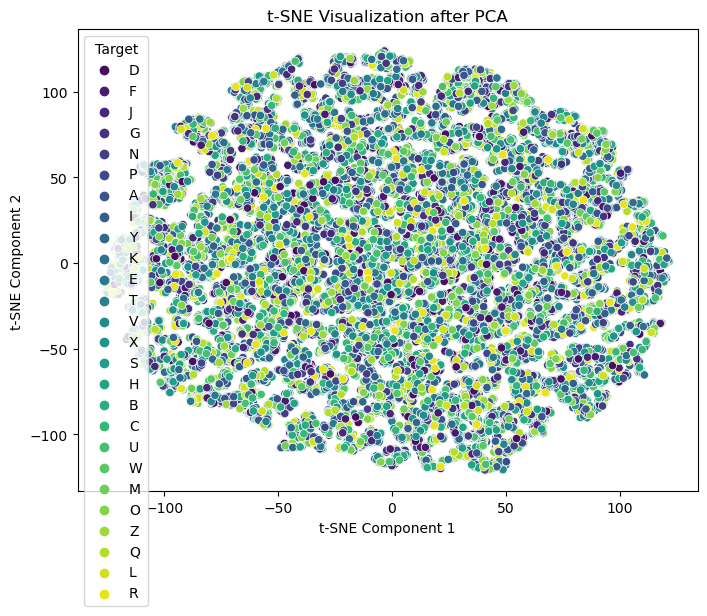

In [83]:
# Visualising the t-SNE results after PCA

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
df_tsne['Target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Target', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization after PCA')
plt.show()


The reduction in dimension by PCA down to 3, might have hurt the TSNE output, but it still shows good result. Few of the alphabets are easily identifiable from the plot even though it has been reduced down so much.

## kNN and Parzen Window classifiers hyper parameter

#### Project the 26 class, 784 dimensional data into 25 Fisher-dimensions

In [8]:
## Separating the features into X and label in Y from the full tmnist dataset
Xf = tmnist_data.iloc[:, 1:]
Yf = tmnist_data['labels']

In [9]:
# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=25)
X_Fisher_25D = lda.fit_transform(Xf, Yf)

### Parameter sweep on K-Nearest Neighbour classifier 

In [91]:
def KNN_sweep(X_train, X_test, Y_train, Y_test, K):
    ## Creating an instance of KNN Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=K)
    knn_classifier.fit(X_train, Y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
      
    # Evaluate the accuracy of the classifier on test set
    test_accuracy = accuracy_score(Y_test, y_pred)
    
    # Let's predct with the train set
    y_pred = knn_classifier.predict(X_train)
    
    # Evaluate the accuracy of the classifier on train set
    train_accuracy = accuracy_score(Y_train, y_pred)
    
    return(train_accuracy, test_accuracy)

In [33]:
## Let's createthe Train Test from the X_Fisher_25D set.
X_Fisher_train, X_Fisher_test, Y_Fisher_train, Y_Fisher_test = train_test_split(X_Fisher_25D
                                                                              , Yf, test_size=0.3, random_state=42)

In [96]:
Knn = {'k-value':[],
       'train-accuracy':[],
       'test-accuracy':[]}

In [98]:
Ksweep = [1, 3, 5, 7, 9, 11, 13, 15, 17]
for k in Ksweep:
    tr_acc, ts_acc = KNN_sweep(X_Fisher_train, X_Fisher_test, Y_Fisher_train, Y_Fisher_test, k)
    Knn['k-value'].append(k)
    Knn['train-accuracy'].append(tr_acc)
    Knn['test-accuracy'].append(ts_acc)

In [112]:
# Write the Knn value file
file_df_list = pd.DataFrame.from_dict(Knn)
file_df_list.to_csv('Knn.csv', index=False, sep=',')

From the sweep Knn.csv file it is seen as the K-Value goes up, the test-train accuracy goes up.

### Parameter sweep on Parzen Window Classifier

In [31]:
def parzen_sweep(X_train, X_test, Y_train, Y_test, sigma):
    ## Creating an instance of the Parzen Window classifier
    parzen_classifier = KernelDensity(bandwidth=sigma)  ## the sigma is the parameter for sweep
    ## Train the parzen classifier on the train data
    parzen_classifier.fit(X_train)
    
    # Make predictions on the test set
    log_density = parzen_classifier.score_samples(X_test)

    # Set a threshold (you can adjust this based on your problem)
    threshold = np.percentile(log_density, 5)  # using the 5th percentile as the threshold
    predictions = log_density < threshold

    # Convert boolean predictions to 0 (negative class) or 1 (positive class)
    y_pred = predictions.astype(int)

    # Evaluate the accuracy of the classifier
    test_accuracy = accuracy_score(Y_test, y_pred)
    
    # Make predictions on the test set
    log_density = parzen_classifier.score_samples(X_train)

    # Set a threshold (you can adjust this based on your problem)
    threshold = np.percentile(log_density, 5)  # using the 5th percentile as the threshold
    predictions = log_density < threshold

    # Convert boolean predictions to 0 (negative class) or 1 (positive class)
    y_pred = predictions.astype(int)

    # Evaluate the accuracy of the classifier
    train_accuracy = accuracy_score(Y_train, y_pred)
    print(sigma)
    return(train_accuracy, test_accuracy)

In [28]:
Parzen = {'sigma-value':[],
          'train-accuracy':[],
          'test-accuracy':[]}

In [35]:
sigma = [0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]
for s in sigma:
    tr_acc, ts_acc = parzen_sweep(X_Fisher_train, X_Fisher_test, Y_Fisher_train, Y_Fisher_test, s)
    Parzen['sigma-value'].append(s)
    Parzen['train-accuracy'].append(tr_acc)
    Parzen['test-accuracy'].append(ts_acc)

0.1
0.5
1
1.5
2
3
4
6
8
10


In [36]:
# Write the Knn value file
file_df_list = pd.DataFrame.from_dict(Parzen)
file_df_list.to_csv('Parzen.csv', index=False, sep=',')

## Perceptron vs. Logistic Regression

### Logistic Regression

In [10]:
def logistic_model(X_train, X_test, Y_train, Y_test, classes):
    ## Creating an instance of logistic regression
    logistic_model = LogisticRegression()
    ## training with Logistic Regression
    logistic_model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = logistic_model.predict(X_test)

    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(Y_test, y_pred)
    
    # Make predictions on the train set
    y_pred = logistic_model.predict(X_train)

    # Evaluate the accuracy of the model
    train_accuracy = accuracy_score(Y_train, y_pred)
    
    return(train_accuracy, test_accuracy)

In [11]:
logistic_A_C = {'run':[],
                'train-accuracy':[],
                'test-accuracy':[]}

In [12]:
fisher_data = X_Fisher_25D ## Dateset from problem 3
labels = Yf                ## the Label used in problem 3

# Select two classes for classification
class_1 = 'A'
class_2 = 'C'

# Filter the data and labels for the selected classes
selected_indices = np.logical_or(labels == class_1, labels == class_2)
selected_data = fisher_data[selected_indices]
selected_labels = labels[selected_indices]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(selected_data, selected_labels, test_size=0.2, random_state=42)

# Train multiple logistic regression models
num_models = 100
accuracies = []

for i in range(num_models):
    # Create and train logistic regression model
    tr_acc, ts_acc = logistic_model(X_train, X_test, Y_train, Y_test, ['A','C'])
    logistic_A_C['run'].append(i)
    logistic_A_C['test-accuracy'].append(ts_acc)
    logistic_A_C['train-accuracy'].append(tr_acc)


In [13]:
# Write the logistic value file
logistic_df = pd.DataFrame.from_dict(logistic_A_C)
logistic_df.to_csv('logistic_A_C.csv', index=False, sep=',')

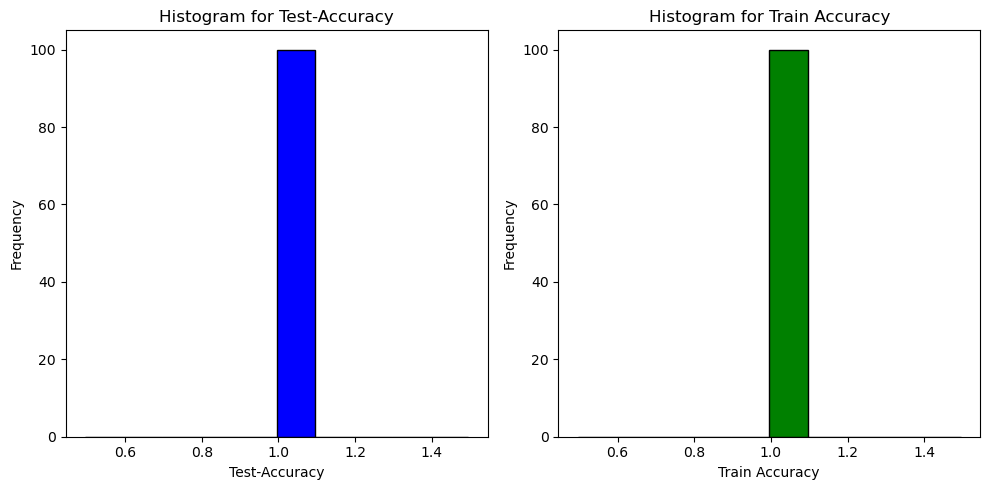

In [14]:
# Plot histograms of Test-Train accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(logistic_df['test-accuracy'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram for Test-Accuracy')
plt.xlabel('Test-Accuracy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(logistic_df['train-accuracy'], bins=10, color='green', edgecolor='black')
plt.title('Histogram for Train Accuracy')
plt.xlabel('Train Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

As expected, after several sweep, the histograms for LR is constant. It does not change anything with every run of LR.

### Perceptron

In [22]:
def perceptron_model(X_train, X_test, Y_train, Y_test, classes):
    ## Creatng an instance of Perceptron
    perceptron_model = Perceptron(max_iter=100, random_state=42)
    ## training the perceptron model
    perceptron_model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = perceptron_model.predict(X_test)

    # Evaluate the accuracy of the model
    test_accuracy = accuracy_score(Y_test, y_pred)
    
    # Make predictions on the train set
    y_pred = perceptron_model.predict(X_train)

    # Evaluate the accuracy of the model
    train_accuracy = accuracy_score(Y_train, y_pred)
    
    return(train_accuracy, test_accuracy)


In [16]:
perceptron_A_C = {'run':[],
                  'train-accuracy':[],
                  'test-accuracy':[]}

In [23]:
fisher_data = X_Fisher_25D ## Dateset from problem 3
labels = Yf                ## the Label used in problem 3

# Select two classes for binary classification
class_1 = 'A'
class_2 = 'C'

# Filter the data and labels for the selected classes
selected_indices = np.logical_or(labels == class_1, labels == class_2)
selected_data = fisher_data[selected_indices]
selected_labels = labels[selected_indices]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(selected_data, selected_labels, test_size=0.2, random_state=42)

# Train multiple perceptron models
num_models = 100
accuracies = []

for i in range(num_models):
    # Create and train perceptron model
    tr_acc, ts_acc = perceptron_model(X_train, X_test, Y_train, Y_test, ['A','C'])
    perceptron_A_C['run'].append(i)
    perceptron_A_C['test-accuracy'].append(ts_acc)
    perceptron_A_C['train-accuracy'].append(tr_acc)


In [24]:
# Write the perceptron value file
perceptron_df = pd.DataFrame.from_dict(perceptron_A_C)
perceptron_df.to_csv('perceptron_A_C.csv', index=False, sep=',')

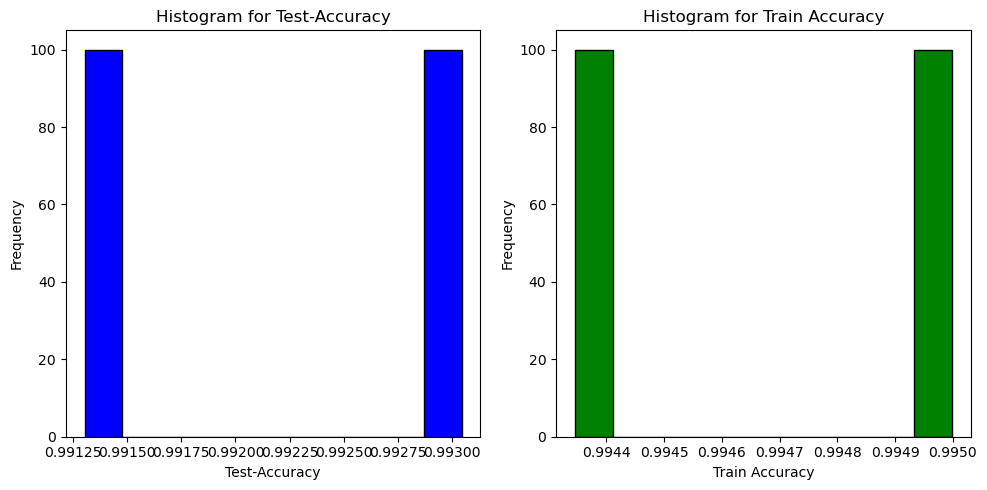

In [26]:
# Plot histograms of Test-Train accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(perceptron_df['test-accuracy'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram for Test-Accuracy')
plt.xlabel('Test-Accuracy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(perceptron_df['train-accuracy'], bins=10, color='green', edgecolor='black')
plt.title('Histogram for Train Accuracy')
plt.xlabel('Train Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

Perceptron in its iterations will converge to the most optimal model.
The graph show 2 values.

#### Average Test-Train accuracy for perceptron and LR

In [27]:
print("Average Test Accuracy, Perceptron:", perceptron_df['test-accuracy'].mean())
print("Average Train Accuracy, Perceptron:", perceptron_df['train-accuracy'].mean())

print("Average Test Accuracy, Logistic regression:", logistic_df['test-accuracy'].mean())
print("Average Test Accuracy, Logistic regression:", logistic_df['test-accuracy'].mean())

Average Test Accuracy, Perceptron: 0.9921739130434785
Average Train Accuracy, Perceptron: 0.9946715963462374
Average Test Accuracy, Logistic regression: 0.9956521739130436
Average Test Accuracy, Logistic regression: 0.9956521739130436
